## Import the Required Libraries

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,  models, datasets
from tensorflow.keras.layers import Conv2D, LeakyReLU

## Loading the Dataset

In [45]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data() #Used the Mnist Data Set

## Concatanating the Dataset

In [46]:
concatenated_data = np.concatenate((train_data, test_data), axis=0)
concatenated_labels = np.concatenate((train_labels, test_labels), axis=0)

#Normalization
concatenated_data = concatenated_data / 255.0

## Split the dataset

In [47]:
# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(concatenated_data, concatenated_labels, test_size=0.4, random_state=42) #Split the training set
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42) #Split the validations and test set

## Reshape Data

In [48]:
#Convert each 2D image into 3D one
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

## Building the model

In [49]:
model = tf.keras.models.Sequential()

# First convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Third convolutional layer with LeakyReLU activation, followed by Batch Normalization and MaxPooling
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#Flattern Layer
model.add(tf.keras.layers.Flatten())

# Dense (fully connected) layer with 128 units and LeakyReLU activation
model.add(tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.001)))

# Dropout layer to reduce overfitting during training
model.add(tf.keras.layers.Dropout(0.4))

# Output layer with 10 units (one for each class) and softmax activation for classification
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 192 (768.00 B)

In [51]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training The Model

In [52]:
history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5216 - loss: 1.4703 - val_accuracy: 0.9266 - val_loss: 0.2563
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9167 - loss: 0.2921 - val_accuracy: 0.9565 - val_loss: 0.1428
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9492 - loss: 0.1804 - val_accuracy: 0.9648 - val_loss: 0.1125
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1285 - val_accuracy: 0.9687 - val_loss: 0.0952
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9694 - loss: 0.1015 - val_accuracy: 0.9710 - val_loss: 0.0872
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9738 - loss: 0.0902 - val_accuracy: 0.9733 - val_loss: 0.0839
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9787 - loss: 0.0729 - val_accuracy: 0.9756 - val_loss: 0.0762
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0682 -

## Plotting the Training & Validation Loss

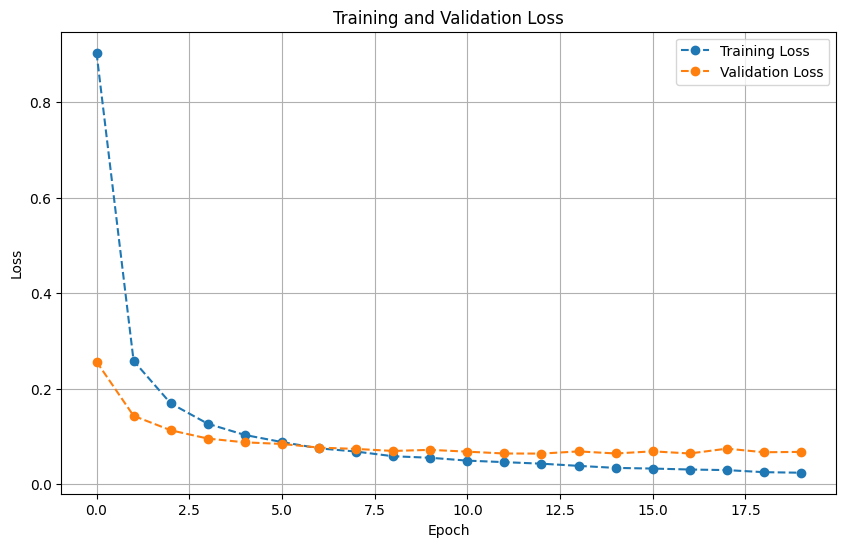

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance with Classification Report and Confusion Matrix Visualization

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1419
           1       0.99      1.00      0.99      1607
           2       0.97      0.97      0.97      1403
           3       0.98      0.98      0.98      1437
           4       0.97      0.99      0.98      1326
           5       0.98      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.98      0.98      0.98      1488
           8       0.98      0.97      0.97      1319
           9       0.98      0.96      0.97      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



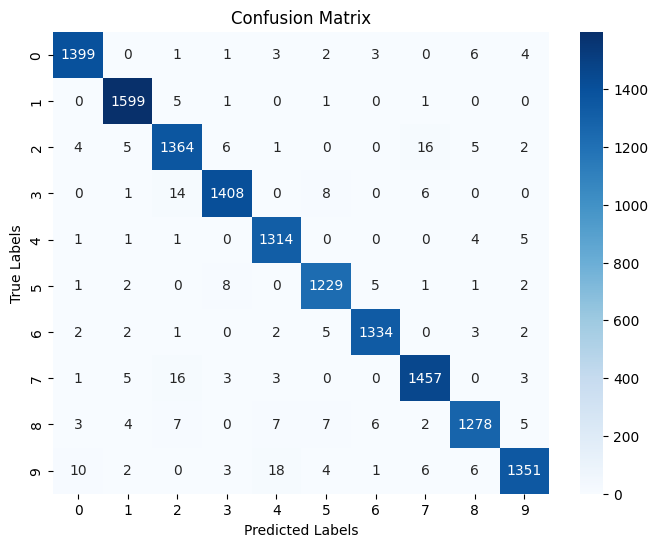

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [55]:
# Evaluate the fine-tuned model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.8726 - loss: 82.9947
Test Accuracy: 87.26%


## Training & Validation Losses for different learning rates

1. When Learning rate = 0.001

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9743 - loss: 0.0842 - val_accuracy: 0.9758 - val_loss: 0.0847
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0581 - val_accuracy: 0.9773 - val_loss: 0.0688
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0513 - val_accuracy: 0.9818 - val_loss: 0.0669
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9825 - val_loss: 0.0633
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9885 - loss: 0.0382 - val_accuracy: 0.9819 - val_loss: 0.0632
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9826 - val_loss: 0.0583
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9829 - val_loss: 0.0673
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.0283 

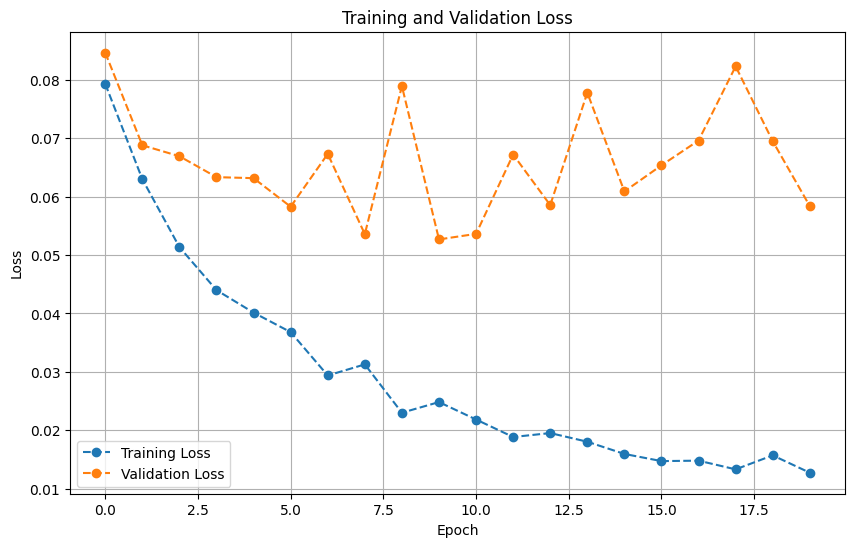

In [56]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2. When Learning rate = 0.01

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9600 - loss: 0.1595 - val_accuracy: 0.9714 - val_loss: 0.1126
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9747 - loss: 0.0918 - val_accuracy: 0.9757 - val_loss: 0.1055
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9763 - loss: 0.0861 - val_accuracy: 0.9123 - val_loss: 0.3056
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9782 - loss: 0.0834 - val_accuracy: 0.9702 - val_loss: 0.1206
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9759 - loss: 0.0876 - val_accuracy: 0.9764 - val_loss: 0.0952
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0736 - val_accuracy: 0.9754 - val_loss: 0.0880
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9811 - loss: 0.0714 - val_accuracy: 0.9777 - val_loss: 0.0794
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9809 - loss: 0.0724 -

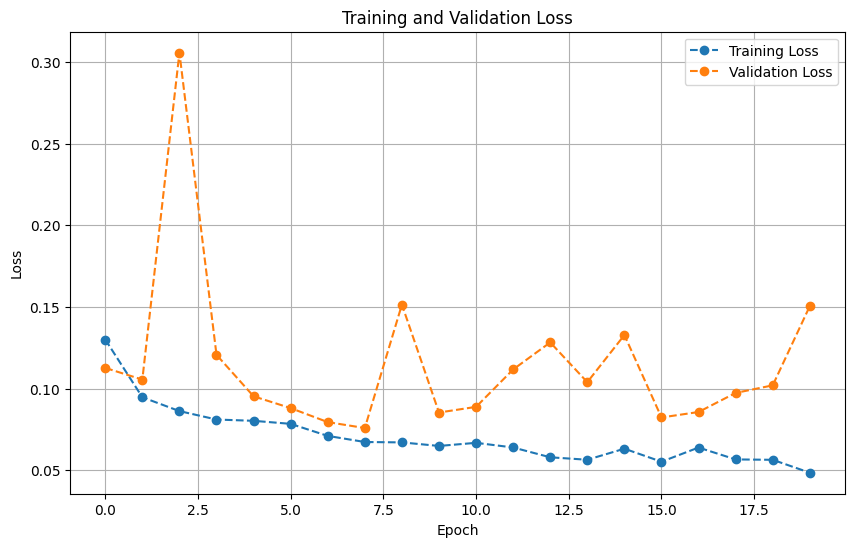

In [57]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

3. When Learning rate = 0.1

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6665 - loss: 1.2807 - val_accuracy: 0.7465 - val_loss: 0.7447
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7355 - loss: 0.9970 - val_accuracy: 0.7816 - val_loss: 0.9224
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5978 - loss: 1.6578 - val_accuracy: 0.8714 - val_loss: 0.4614
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6535 - loss: 1.7159 - val_accuracy: 0.8865 - val_loss: 0.8786
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7311 - loss: 1.0641 - val_accuracy: 0.9123 - val_loss: 0.3031
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7232 - loss: 1.2846 - val_accuracy: 0.7831 - val_loss: 1.0493
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7244 - loss: 1.1998 - val_accuracy: 0.8316 - val_loss: 0.9252
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7268 - loss: 1.2502 -

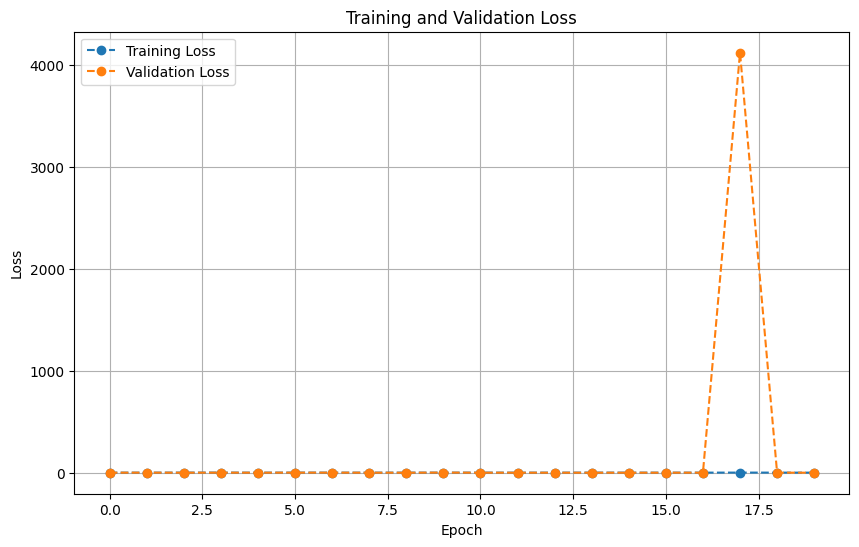

In [58]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o') #Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o') # Validation Loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()